# MASS application

This is an example workflow accompanying the manuscript **Multi-Attribute Subset Selection enables prediction of representative phenotypes across microbial populations** aiming at facilitating the application of the MASS algorithm using DATASET 1.

## Set-up and data import

In [1]:
from MASS import MASS, get_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
import os
os.getcwd()
os.listdir('../Data')
#mypath = 'data/'
#[f for f in os.listdir(mypath) if os.path.isfile(os.path.join(mypath, f))]

['growth_profiles_binary.xlsx']

In [5]:
df = pd.read_excel('../Data/growth_profiles_binary.xlsx',
                     index_col='strain')  # ,index_col='Mutant'

df_new = df.astype(float)
X = df_new.values
n, d = X.shape
"""## only for classify, 0 -->-1 """

X[X == 0] = -1

df.iloc[0:3,:]

,difcoMB,HMBcmpt,HMBpep,HMBaa,HMBlips,HMBoligo,HMBorg,HMBntrl,HMBamisug,HMBacdsug,HMB--
strain,,,,,,,,,,,
fang,1,0,1,1,1,0,0,0,0,0,0
kordia,1,0,0,0,1,0,0,0,0,0,0
citrea,1,1,1,1,1,1,1,1,1,1,0


## Applying MISI to identify most informative feature sets

In [6]:
bestB, bestb0, bestz, bestKSI, obj, m = MASS(X, 10, Ncpu=8)

Using license file /usr/local/gurobi/gurobi.lic
Set parameter TokenServer to value sccsvc
Changed value of parameter Threads to 8
   Prev: 0  Min: 0  Max: 1024  Default: 0


In [7]:
m.

<gurobi.Model MIP instance Unnamed: 12 constrs, 990 vars, Parameter changes: Threads=8, OutputFlag=0>

In [7]:
my_range = range(d-1, 0, -1)  # range(d-2,0,-2)#
my_l = len(my_range)  # d-1#37
myseed = 2023
rand = np.random.RandomState([myseed])

z_all = []
B_all = []
obj_all = []
for r in my_range:
    print(r)
    bestB, bestb0, bestz, bestKSI, obj = MASS(X, r, Ncpu=8)
    z_all.append(bestz)
    B_all.append(bestB)
    obj_all.append(obj)

10
Using license file /usr/local/gurobi/gurobi.lic
Set parameter TokenServer to value sccsvc
Changed value of parameter Threads to 8
   Prev: 0  Min: 0  Max: 1024  Default: 0
9
Changed value of parameter Threads to 8
   Prev: 0  Min: 0  Max: 1024  Default: 0
8
Changed value of parameter Threads to 8
   Prev: 0  Min: 0  Max: 1024  Default: 0
7
Changed value of parameter Threads to 8
   Prev: 0  Min: 0  Max: 1024  Default: 0
6
Changed value of parameter Threads to 8
   Prev: 0  Min: 0  Max: 1024  Default: 0
5
Changed value of parameter Threads to 8
   Prev: 0  Min: 0  Max: 1024  Default: 0
4
Changed value of parameter Threads to 8
   Prev: 0  Min: 0  Max: 1024  Default: 0
3
Changed value of parameter Threads to 8
   Prev: 0  Min: 0  Max: 1024  Default: 0
2
Changed value of parameter Threads to 8
   Prev: 0  Min: 0  Max: 1024  Default: 0
1
Changed value of parameter Threads to 8
   Prev: 0  Min: 0  Max: 1024  Default: 0


<AxesSubplot:>

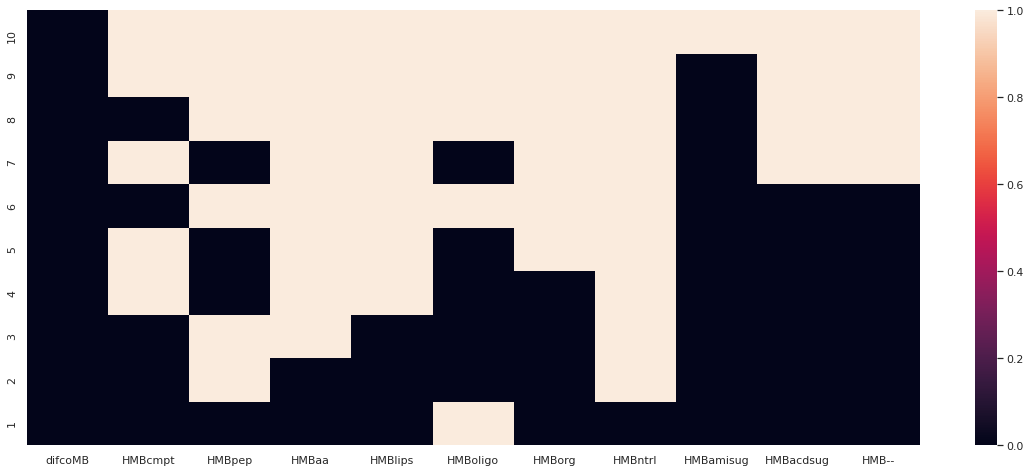

In [9]:
plt.figure(figsize=(20, 8))
sns.heatmap(np.array(z_all).astype(int),
            xticklabels=df_new.columns.values,
            yticklabels=my_range, vmin=0, vmax=1)

<AxesSubplot:>

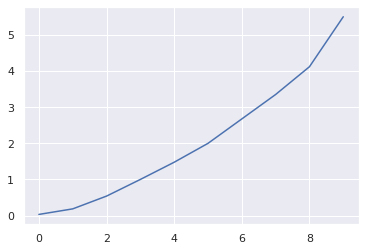

In [16]:
df_z_all = pd.DataFrame.from_records(z_all, columns=df_new.columns)
df_z_all.to_csv('./Results/MIP_classify_z_all_11.csv', index=False)
"""## obj_all increase when we have fewer features and more responses"""

pd.Series(obj_all).plot()

<AxesSubplot:>

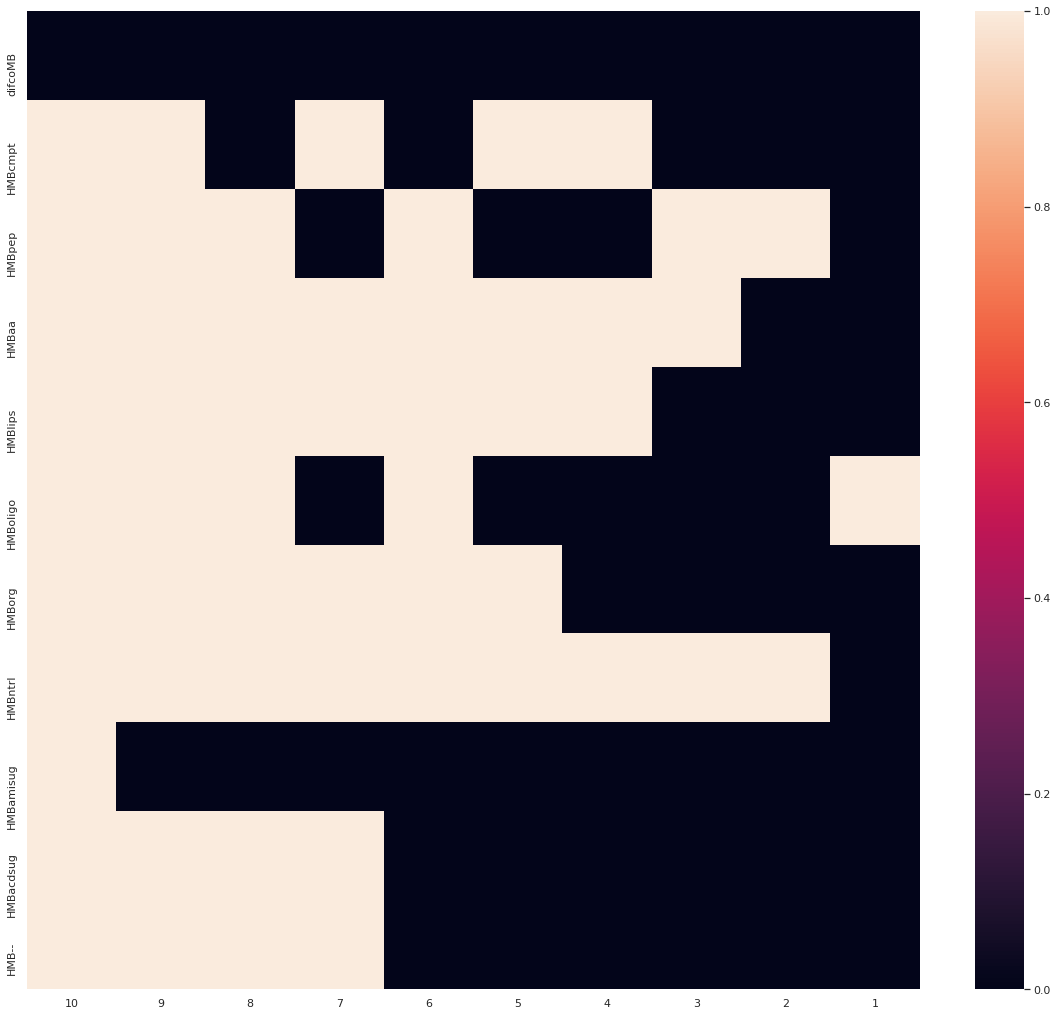

In [18]:
plt.figure(figsize=(20, 18))
sns.heatmap(np.array(z_all).T.astype(int),
            xticklabels=my_range,  # str_times,
            yticklabels=df_new.columns.values, vmin=0, vmax=1)

<AxesSubplot:>

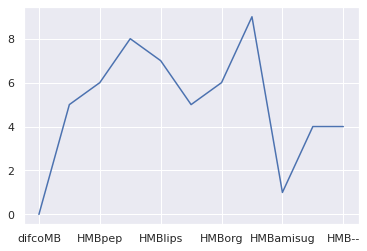

In [19]:
df3sum = df_z_all.sum()
df3sum.plot()